# Determine Fly Head Orientation


Goals:
- 90% accuracy in getting a fix
- attempt some CV methods in order to address this fix
- attempt a Neural Network that will address this issues

ToDo:
- could develop something where the best method is run when the fly angle algorithm fails... this would apply outside of the experiment...




In [1]:
# Import Libraries
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad
from lib.plotting.flyviz import single_image_save,two_image_save_Otsu, two_image_save, get_contour_centroid, get_objectmask, get_fill_flymask, get_contour_centroid_adj
# wrapping libraries:
from scipy import interpolate


c:\Users\lkrow\vscodeProjects\My-Repos-Warren-Lab\flyplot
Initialized Plotting Package
Initialized Parsing Package


height 1200
Angle Test!
Angle Value: -142.48188681593777
My Angle Value: 255.03622636812446
mask radius 570
angle final -2.4867780493920137
[[417 376]
 [417 377]
 [417 378]
 ...
 [420 376]
 [419 376]
 [418 376]]


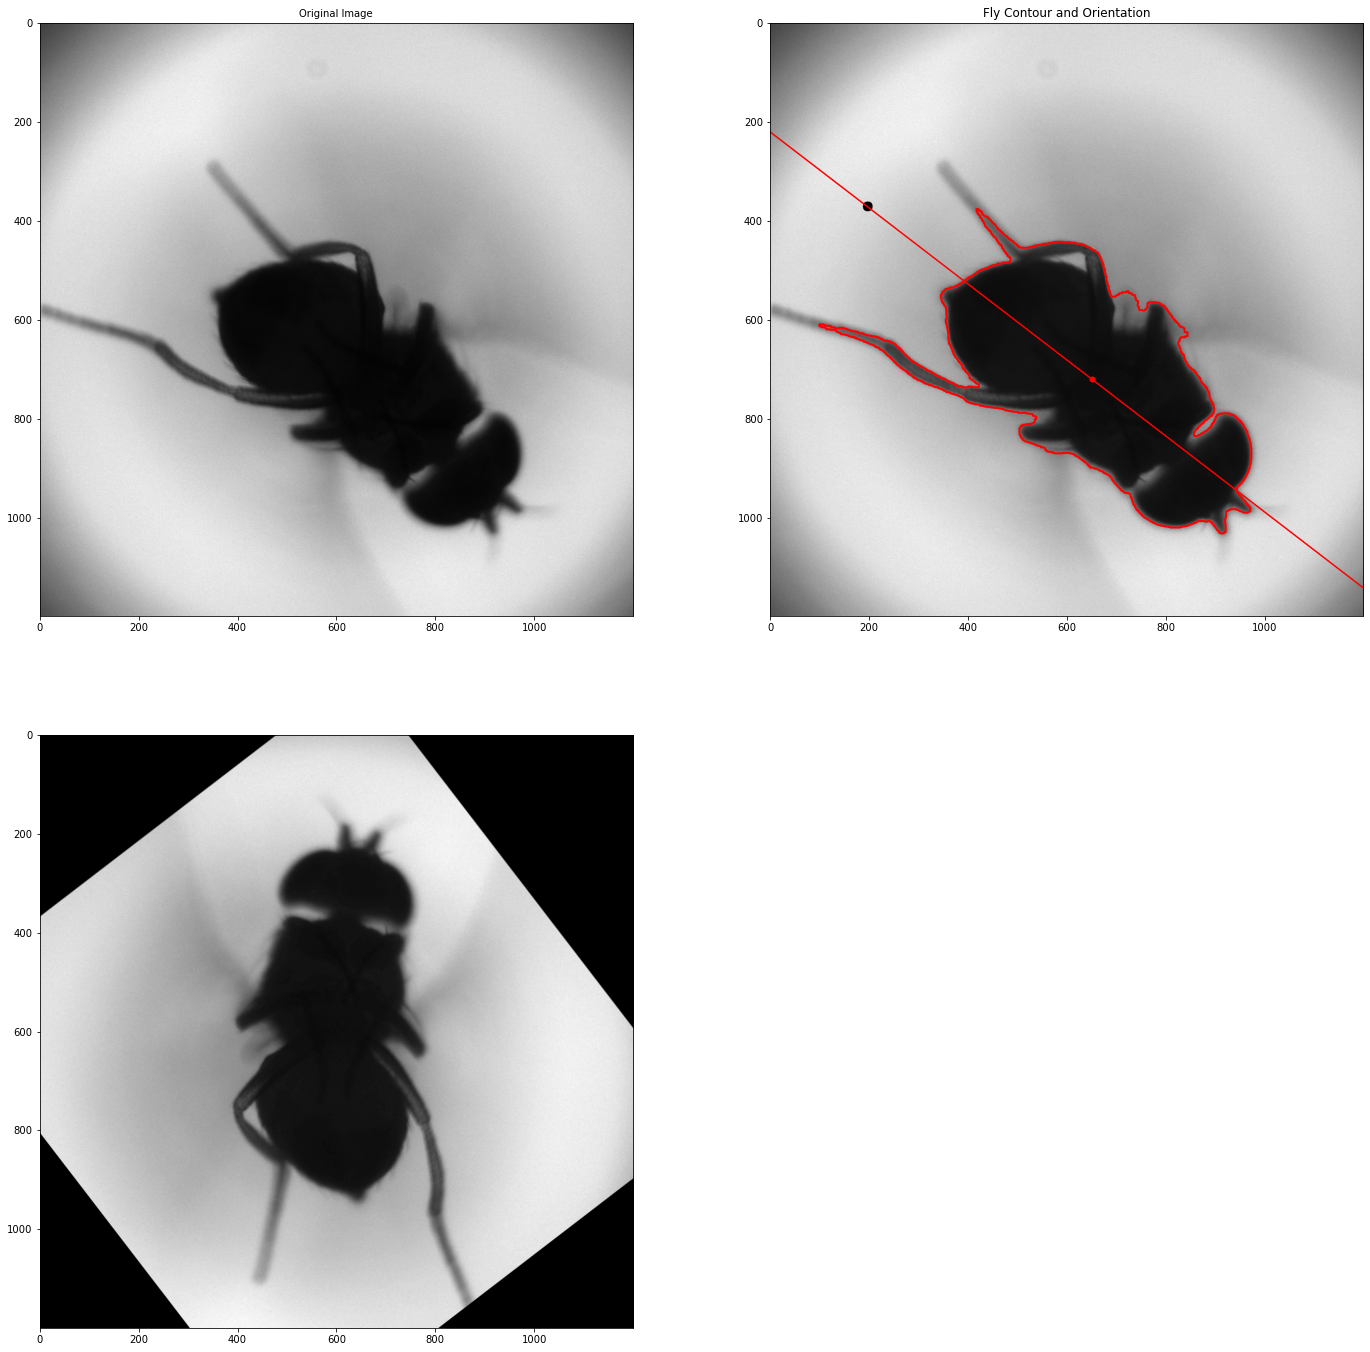

In [2]:
single_image_save('imgs/20240408151332_5837.png',display=True)

height 1200
Angle Test!
Angle Value: 67.94377334440605
My Angle Value: 315.8875466888121
(759, 1047)
mask radius 570
height 1200
Angle Test!
Angle Value: 120.91954140260084
My Angle Value: 61.83908280520167
(279, 1053)
mask radius 570
(759, 1047)


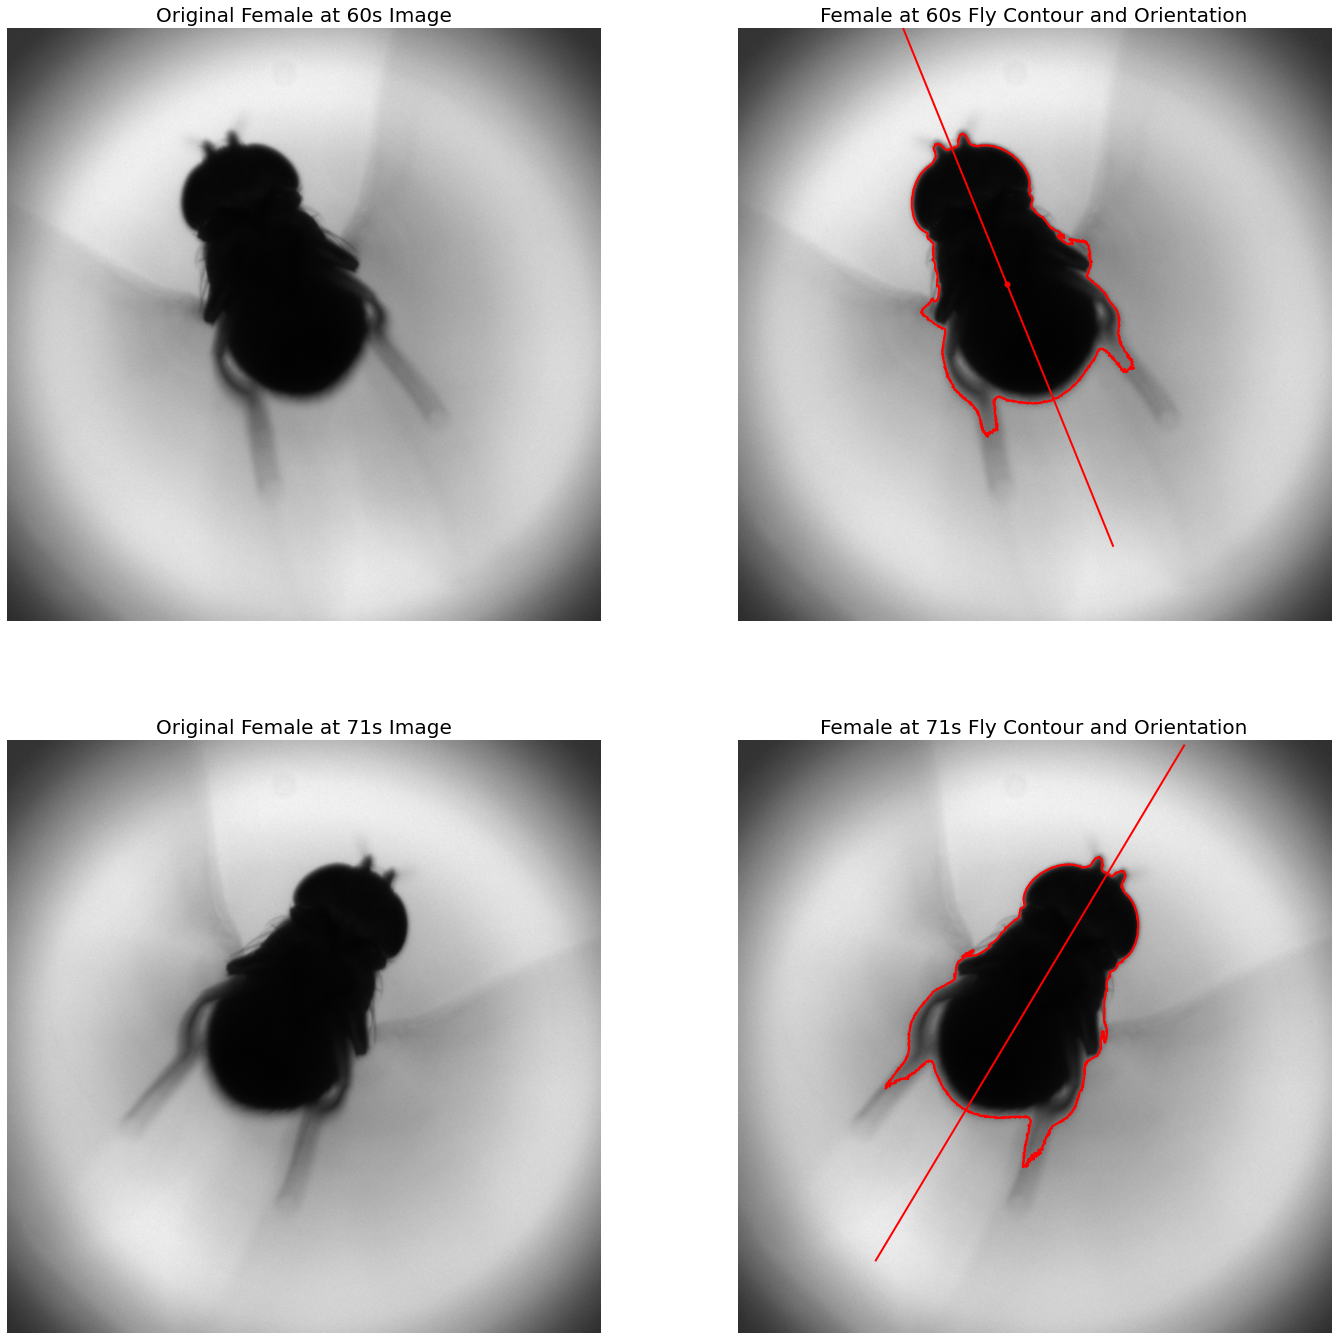

In [3]:
two_image_save_Otsu('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

height 1200
Angle Test!
Angle Value: 65.28706143794379
My Angle Value: 310.5741228758876
(749, 951)
mask radius 570
height 1200
Angle Test!
Angle Value: 119.1270765768938
My Angle Value: 58.254153153787584
(356, 959)
mask radius 570
(749, 951)


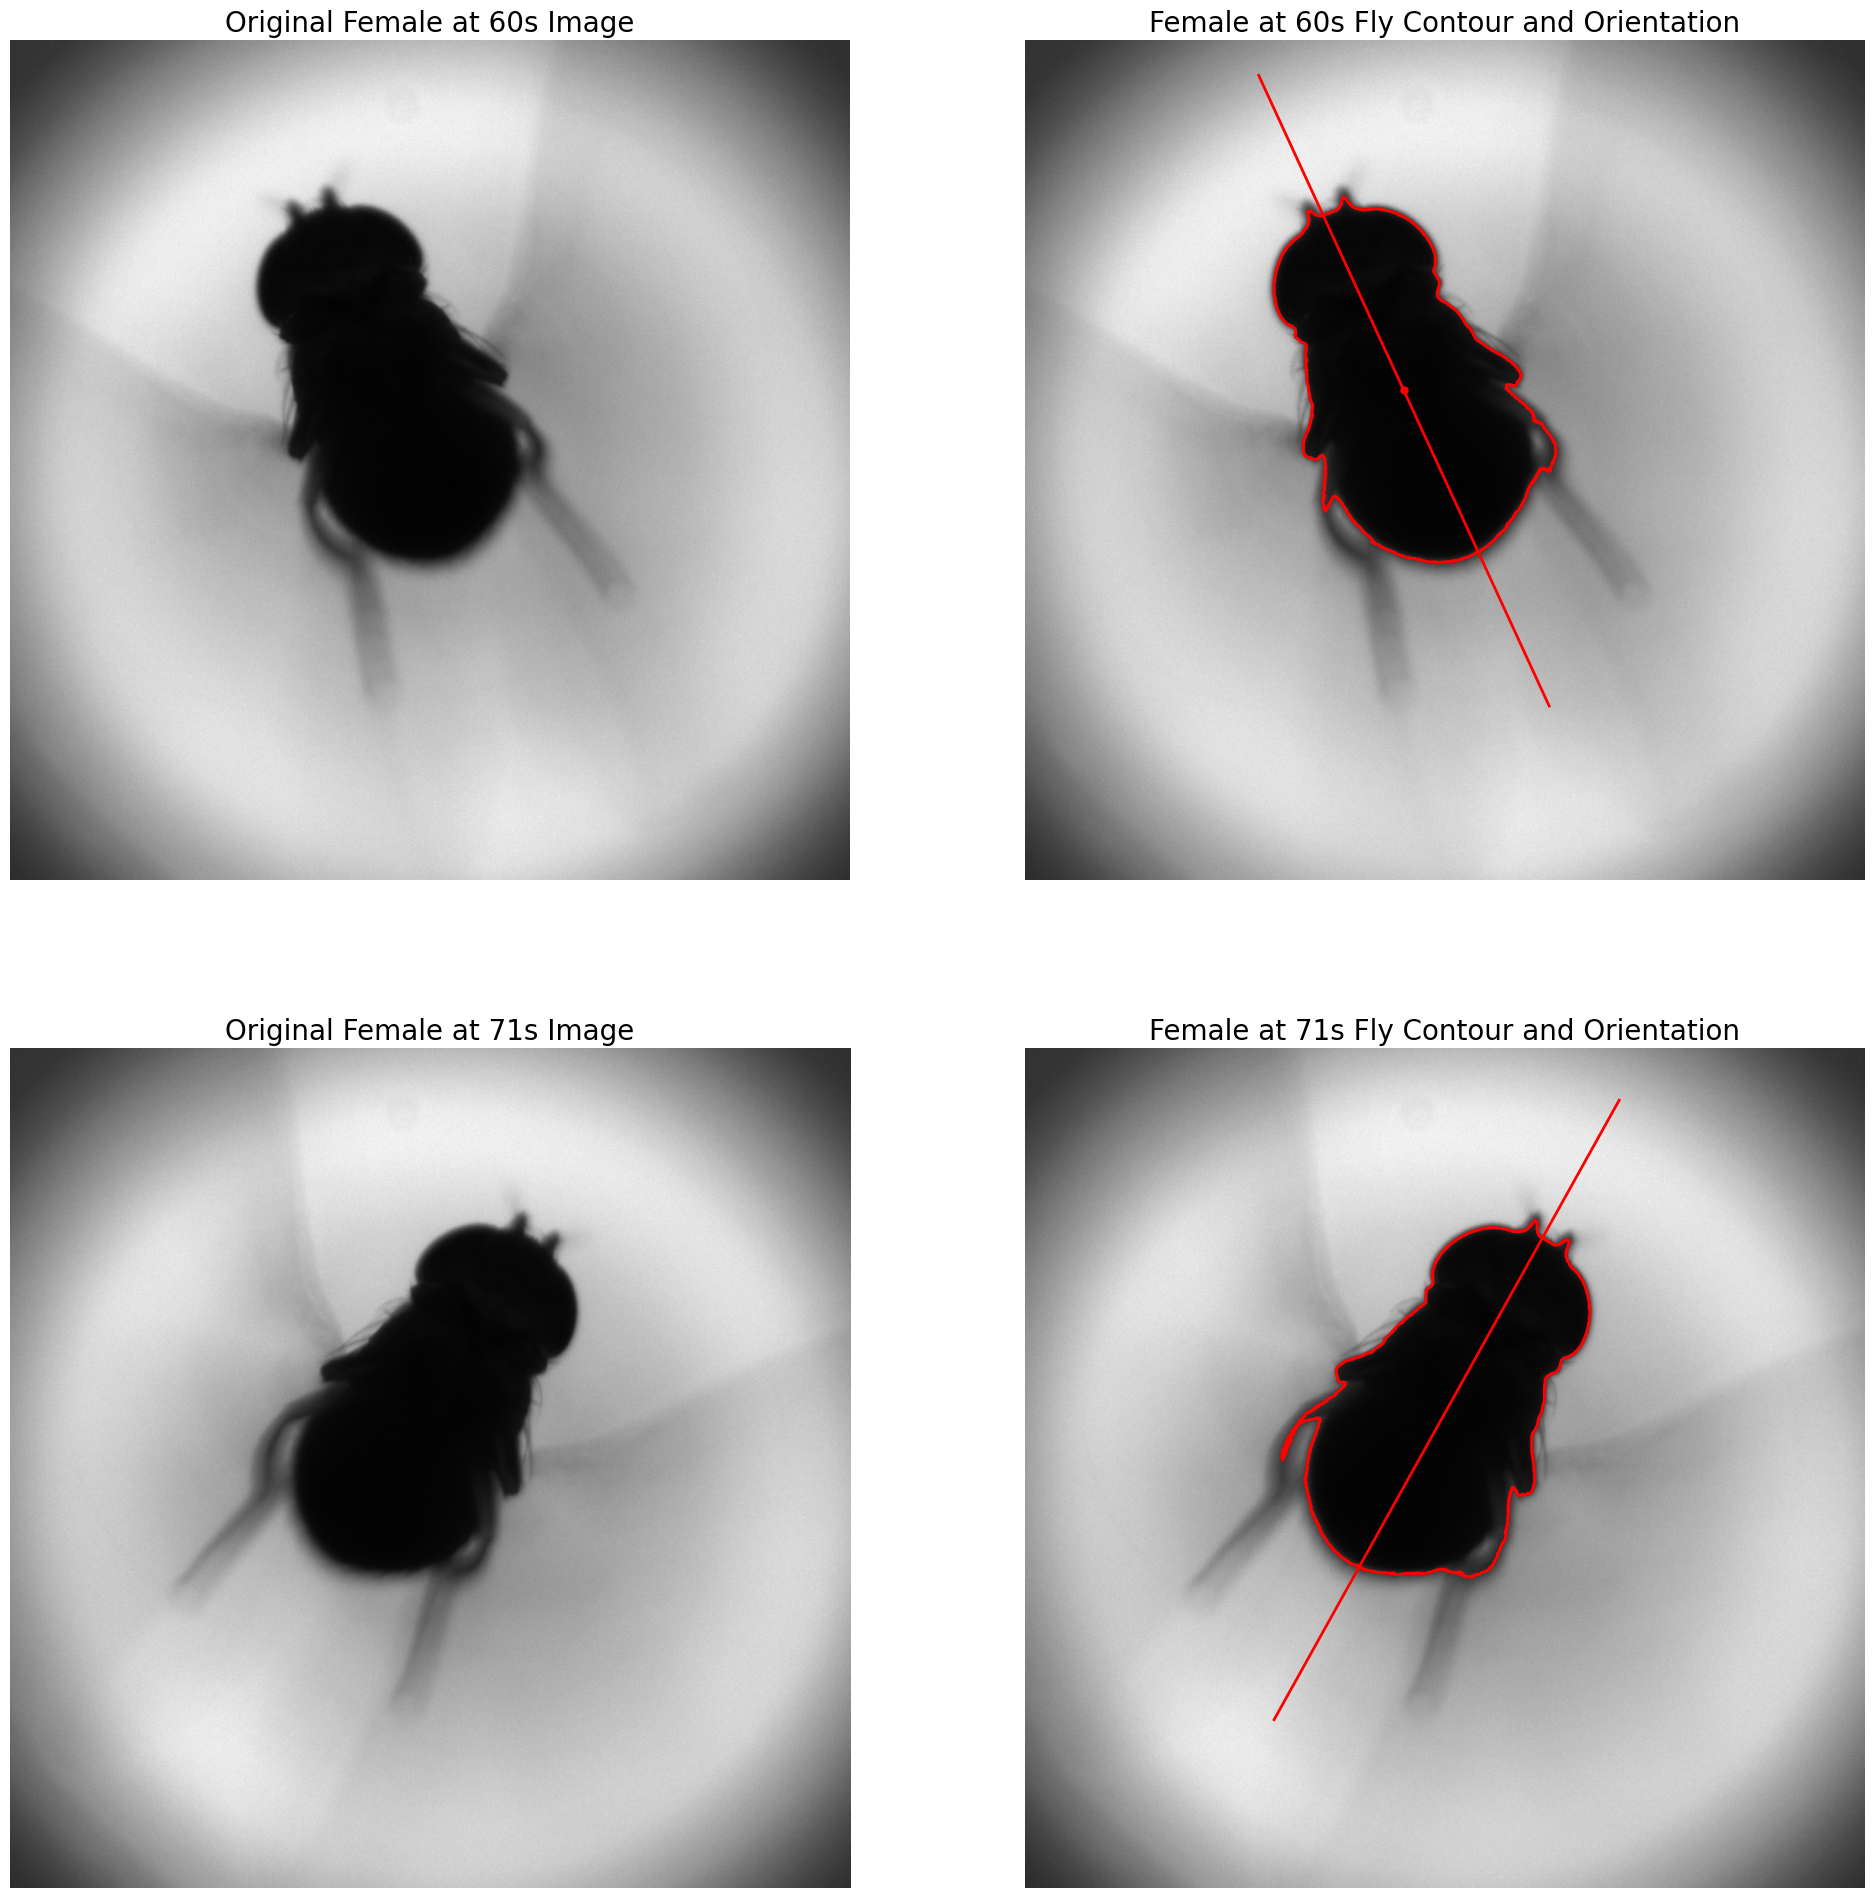

In [4]:
two_image_save('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

height 1200
Angle Test!
Angle Value: 69.76702275812531
My Angle Value: 319.5340455162506
(761, 898)
mask radius 570
height 1200
Angle Test!
Angle Value: 52.69167577430689
My Angle Value: 285.38335154861375
(874, 875)
mask radius 570
(761, 898)


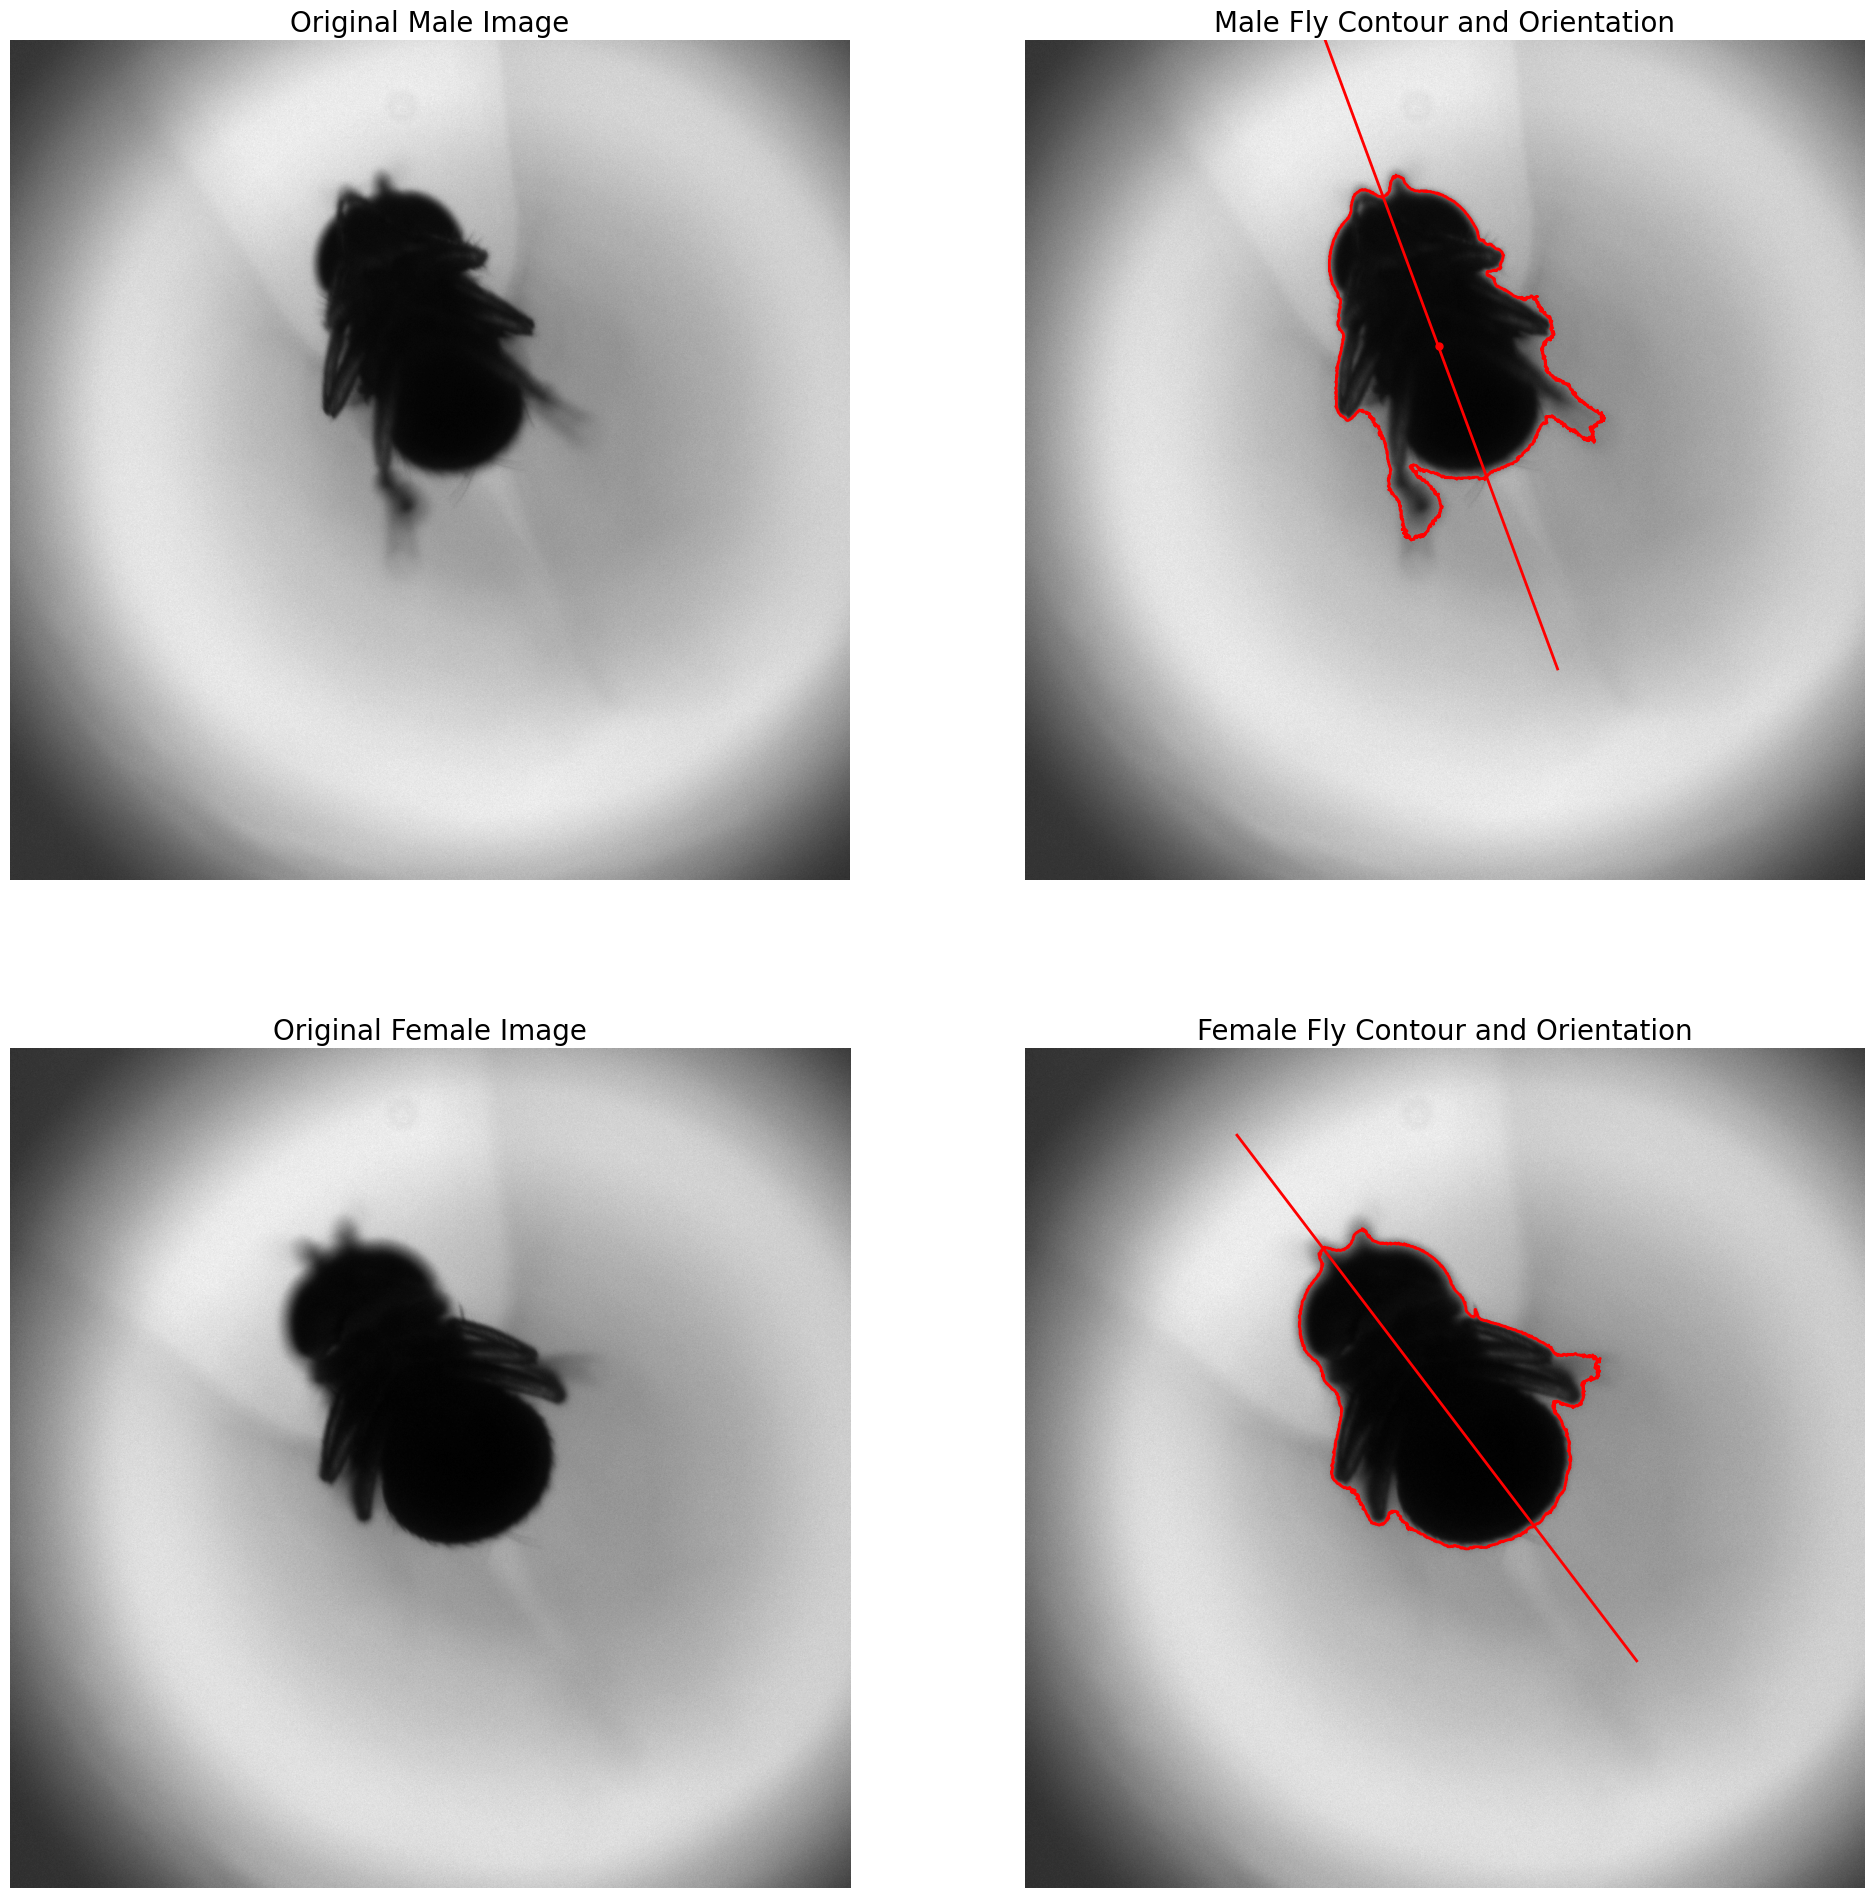

In [6]:
two_image_save_Otsu('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female", display=True)

height 1200
Angle Test!
Angle Value: 69.65016049260629
My Angle Value: 319.3003209852126
(735, 829)
mask radius 570
height 1200
Angle Test!
Angle Value: 53.813127143403584
My Angle Value: 287.6262542868072
(847, 856)
mask radius 570
(735, 829)


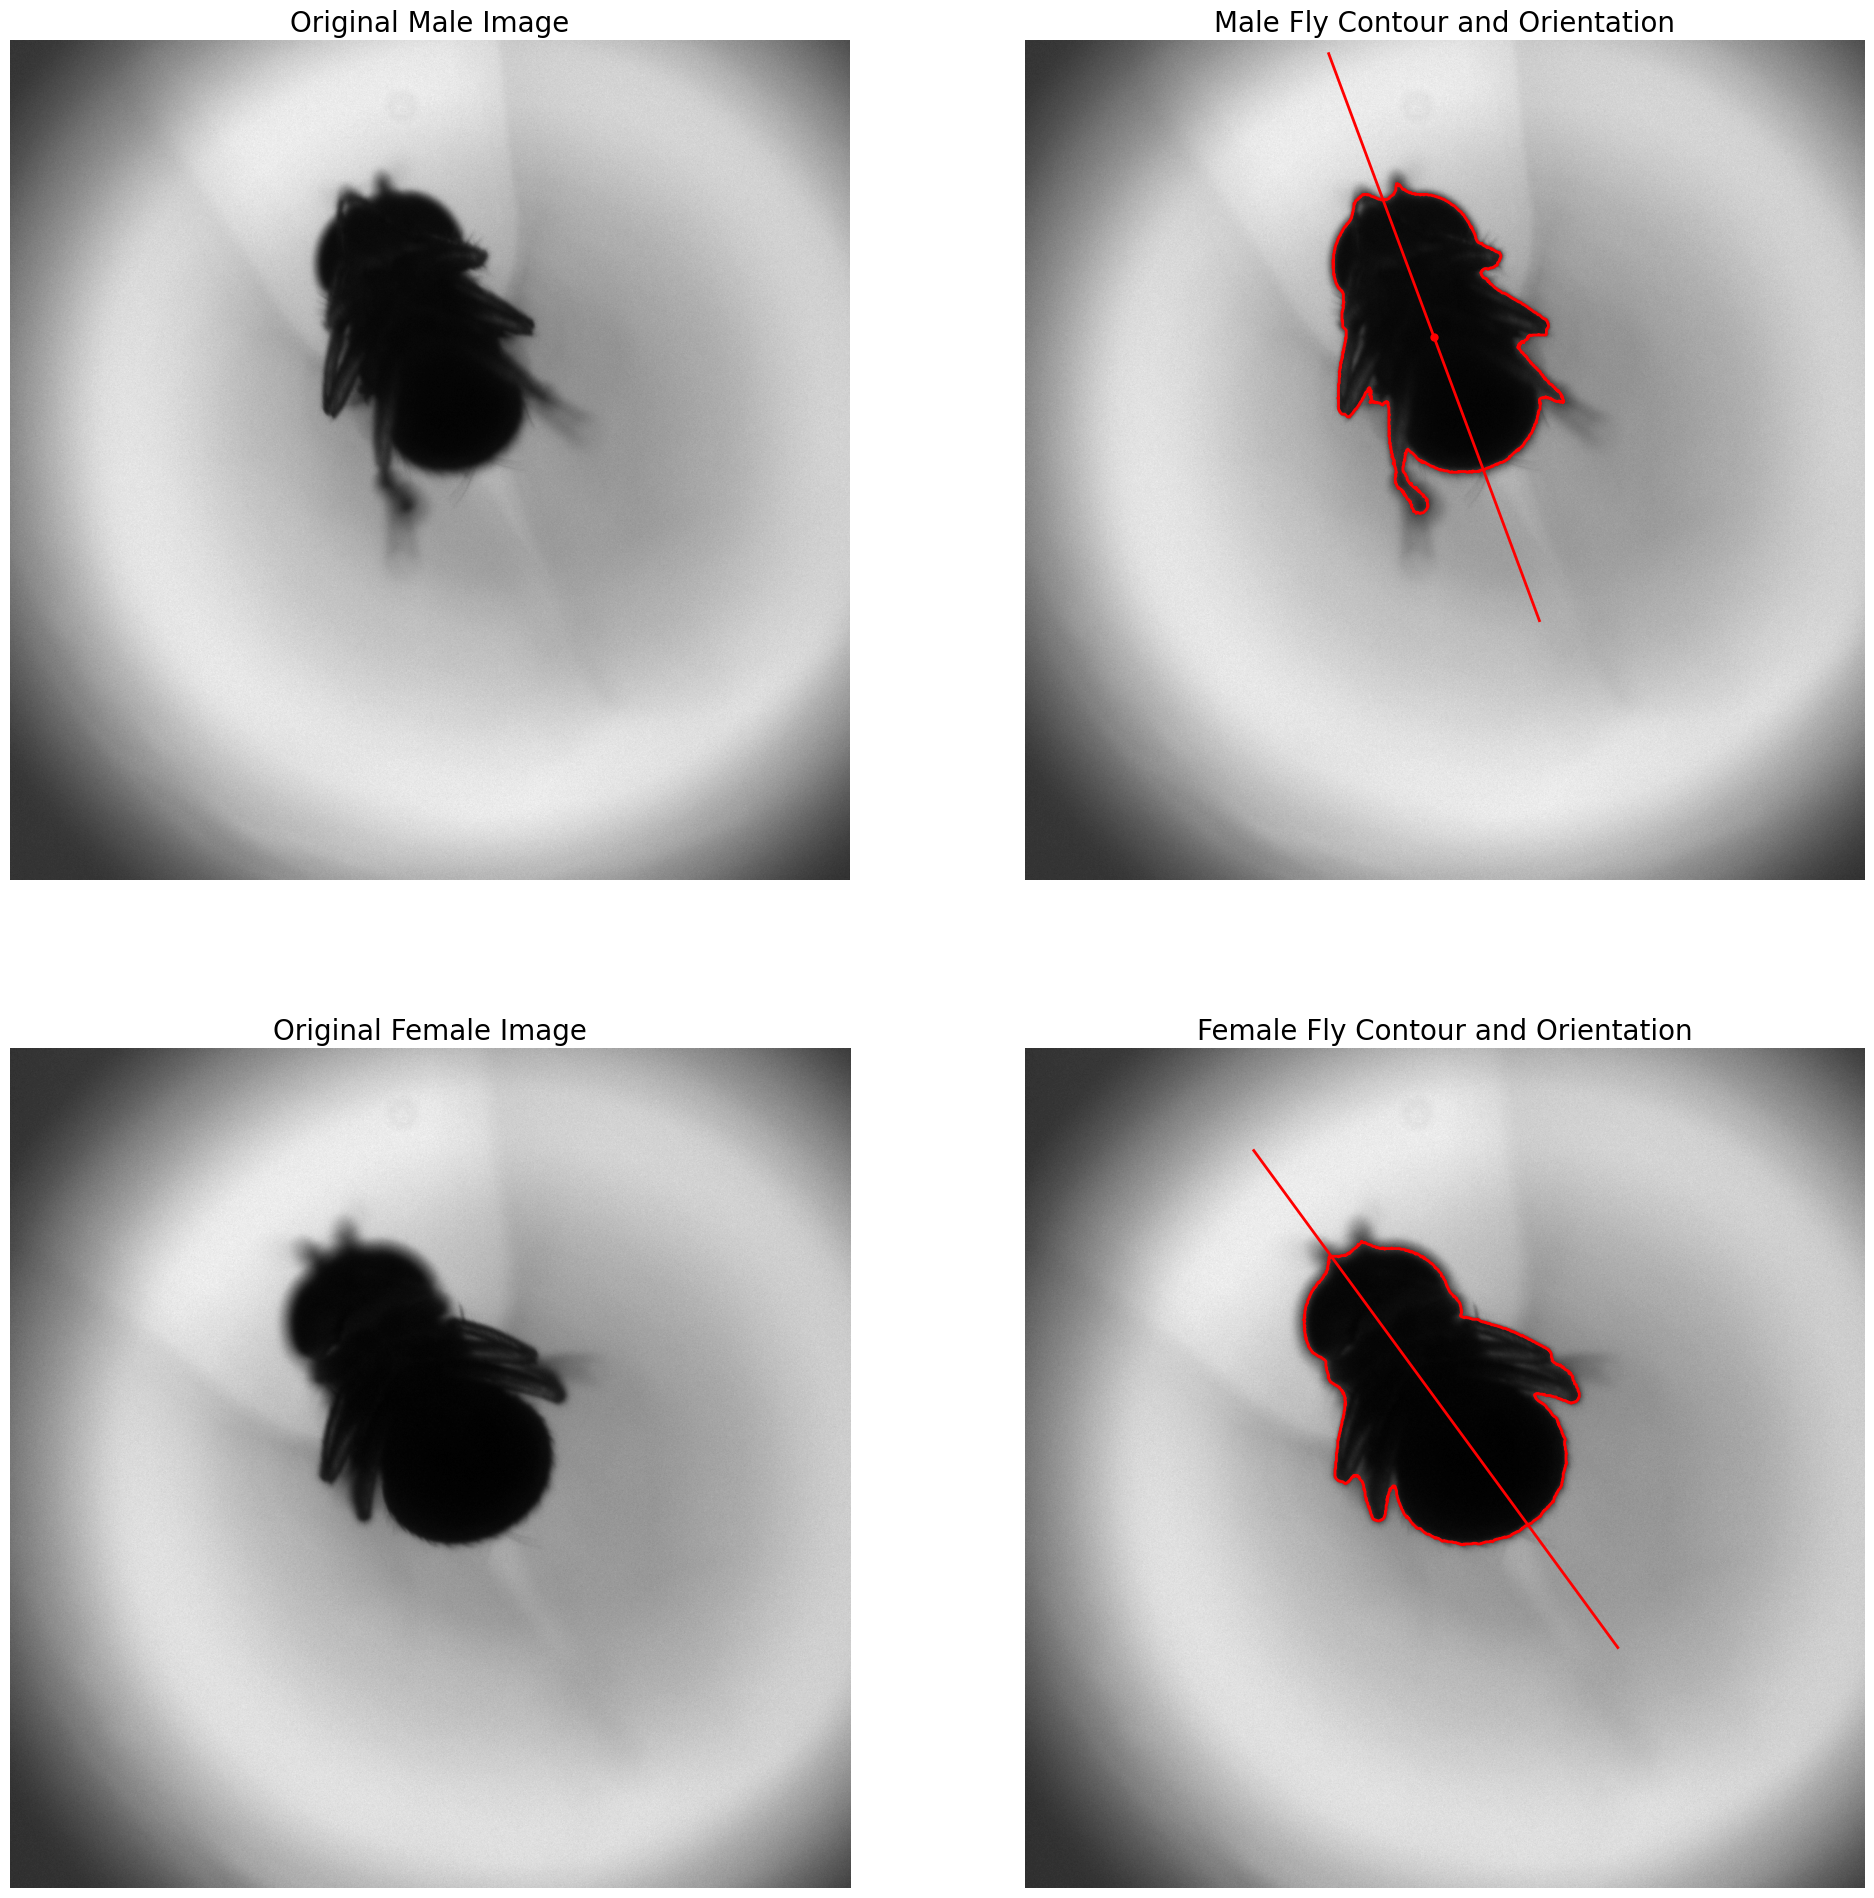

In [8]:
two_image_save('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female",display=True)

Method 1: Comparing to a fixed width with a specified curve based on training data...
- Point by point difference using a fixed width...
- Look for the max on both ends

OTHER:
- 


METHOD: 10 up 10 down for a fly... develop algorithm 
- create the overlayed traces

1. Cut out section of the back that is large
2. interpoate edge of contour and get the curve of the back that is series of point
3. everytime new flip cut out smaller region aroud the contour for the centerline
4. Then we compute the cross correlation between the base case and the two test cases...
    - will then get the maximal product...

    - segments in the front will not fit the shape..


CROSS CORRELATION.... DOt product between points but need to project...

Step 1: Access contour for an image 

height 1200
Angle Test!
Angle Value: 50.05796658886543
My Angle Value: 280.1159331777309
mask radius 570
height 1200
Angle Test!
Angle Value: 90.03193682072275
My Angle Value: 0.06387364144549679
[[[492 143]]

 [[492 144]]

 [[491 145]]

 ...

 [[495 143]]

 [[494 143]]

 [[493 143]]] (598, 599) (598, 1326) (599, -126)


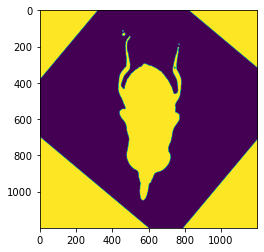

In [81]:
fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid_adj("imgs/20240416142407_4654.png")
print(max_contour, centroid, body_axis_pt_0, body_axis_pt_1)
plt.imshow(fly_mask)

#### Step 2: Rotate the image so it is at least centered up down on the y axis

In [ ]:
## Get the Angle of Rotation


In [82]:
x1 = body_axis_pt_0[0]
x2 =body_axis_pt_1[0]
y1 = body_axis_pt_0[1]
y2 =body_axis_pt_1[1]
m = (y2 - y1)/(x2-x1)
print(m)
# y = mx+b
b = y1 - m*x1
print(b)

x = np.linspace(x1,x2+1, num = len(max_contour))
y = m*x + b
print(y)
points = []
for i in range(len(x)):
    points.append((int(x[i]),int(y[i])))
print(points)

-1452.0
869622.0
[ 1326.          1324.98176718  1323.96353436 ... -1575.96353436
 -1576.98176718 -1578.        ]
[(598, 1326), (598, 1324), (598, 1323), (598, 1322), (598, 1321), (598, 1320), (598, 1319), (598, 1318), (598, 1317), (598, 1316), (598, 1315), (598, 1314), (598, 1313), (598, 1312), (598, 1311), (598, 1310), (598, 1309), (598, 1308), (598, 1307), (598, 1306), (598, 1305), (598, 1304), (598, 1303), (598, 1302), (598, 1301), (598, 1300), (598, 1299), (598, 1298), (598, 1297), (598, 1296), (598, 1295), (598, 1294), (598, 1293), (598, 1292), (598, 1291), (598, 1290), (598, 1289), (598, 1288), (598, 1287), (598, 1286), (598, 1285), (598, 1284), (598, 1283), (598, 1282), (598, 1281), (598, 1280), (598, 1279), (598, 1278), (598, 1277), (598, 1276), (598, 1275), (598, 1274), (598, 1273), (598, 1272), (598, 1271), (598, 1269), (598, 1268), (598, 1267), (598, 1266), (598, 1265), (598, 1264), (598, 1263), (598, 1262), (598, 1261), (598, 1260), (598, 1259), (598, 1258), (598, 1257), (

In [67]:
print(x2,x1)
print(y2,y1)

599 598
-100 1300


In [68]:
type(body_axis_pt_0)

tuple

In [83]:
import copy
intersect_orig = []
for p in range(len(points)):
    for v in range(len(max_contour)):
        # print(points[p], tuple(max_contour[v][0]))
        if points[p] == tuple(max_contour[v][0]):
            print("True")
            intersect_orig.append((p,v))
print(intersect_orig)
intersect = copy.deepcopy(intersect_orig)
for val in range(1, len(intersect_orig)):
    if np.abs(intersect_orig[val][0] - intersect_orig[val-1][0]) < 20:
        # if the difference is less than 20 then drop the second one
        intersect.remove(intersect_orig[val])
        print(intersect, intersect_orig)
print(intersect)

True
True
True
True
True
True
True
True
True
[(351, 1046), (352, 1047), (353, 1048), (354, 1049), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)]
[(351, 1046), (353, 1048), (354, 1049), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)] [(351, 1046), (352, 1047), (353, 1048), (354, 1049), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)]
[(351, 1046), (354, 1049), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)] [(351, 1046), (352, 1047), (353, 1048), (354, 1049), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)]
[(351, 1046), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)] [(351, 1046), (352, 1047), (353, 1048), (354, 1049), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)]
[(351, 1046), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)] [(351, 1046), (352, 1047), (353, 1048), (354, 1049), (355, 1050), (356, 1051), (357, 1052), (358, 1053), (1004, 2353)]
[(351, 1046), 

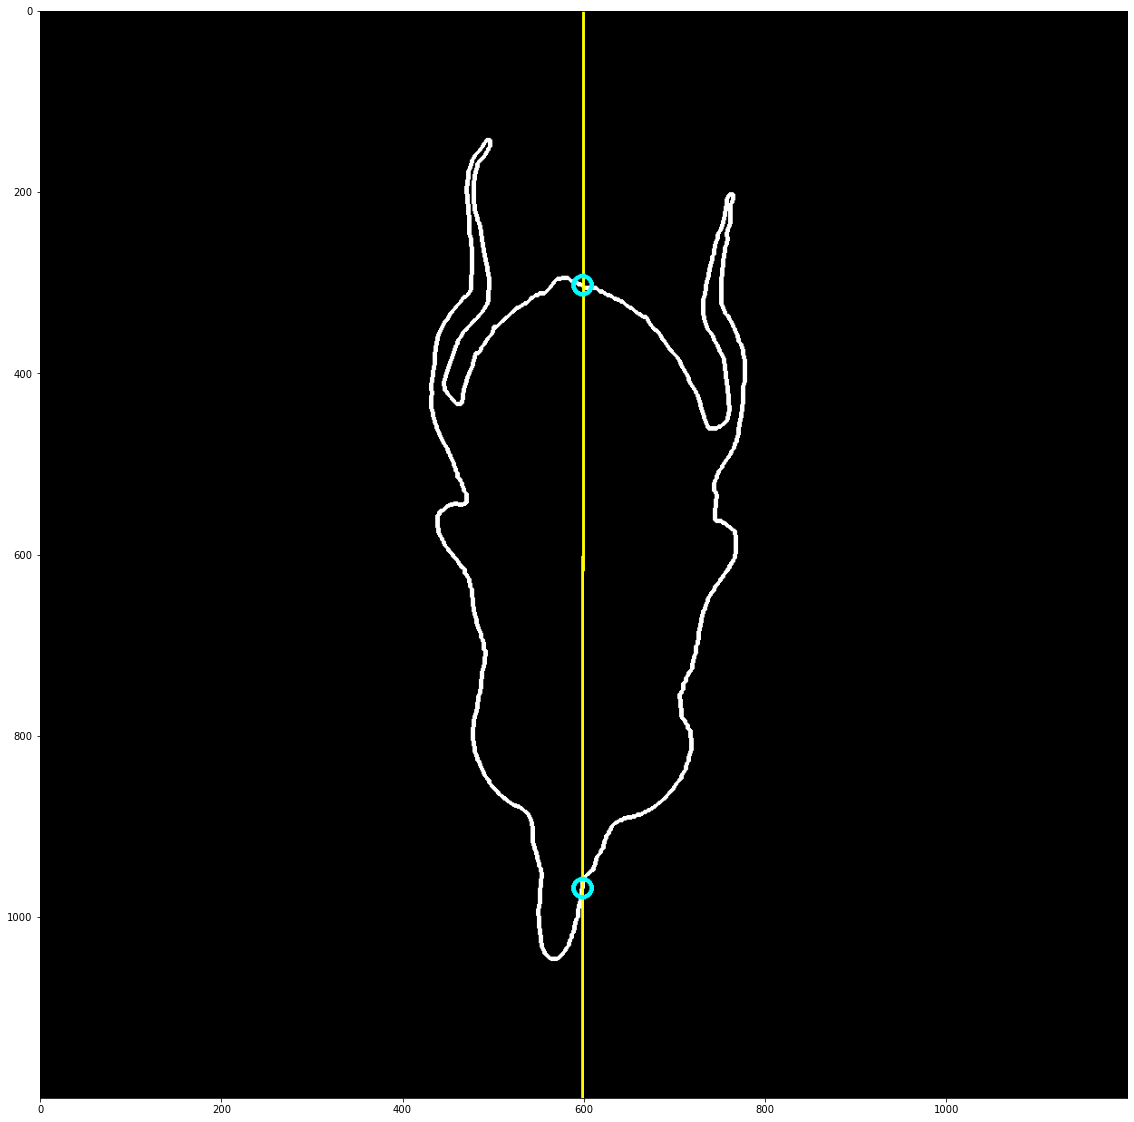

In [84]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)
cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,255,255),thickness =3 )

cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
plt.imshow(mask_fly)

In [85]:
# take the 30 contour points to the lefts and right of the two intersections and plot
adj_intersect = [(intersect[0][1]+50,intersect[0][1]-50),(intersect[1][1]+50,intersect[1][1]-50)]
print(adj_intersect)

[(1096, 996), (2403, 2303)]


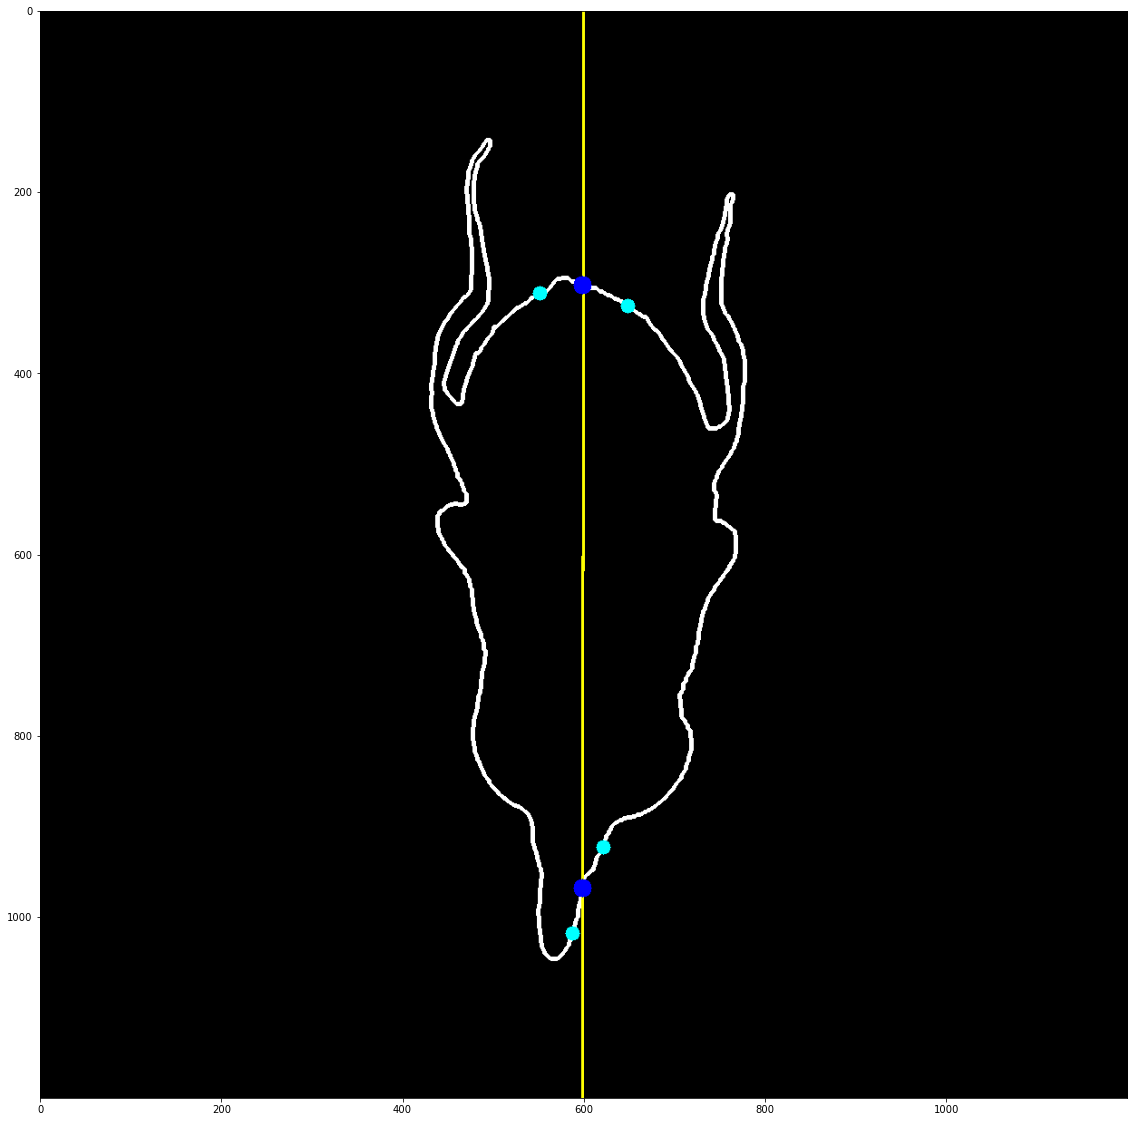

In [86]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)
cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =-3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =-3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)
# front 
cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][1]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]][0]),8, color = (0,255,255),thickness =-1 )


# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+8][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+16][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[-1][0]),10, color = (0,0,255),thickness =-1 )

# back
cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][0]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][1]][0]),8, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly, max_contour[2474][0] ,8,color = (0,255,255),thickness =4 )
plt.imshow(mask_fly)

In [12]:
len(max_contour)

2749

In [73]:
max_contour[2474]

array([[727, 427]], dtype=int32)

array([[544, 215]], dtype=int32)

In [77]:
# Here we get the range of contours for the two sides
# First check if value is negative.. if negative then add the length of the list
def isnegative(points):
    """checks if current value is negative and if so adds length of contour to it and returns new value"""
    for tple in range(len(points)):
        for val in range(len(points[tple])):
            points[tple]  = list(points[tple])
            if points[tple][val] < 0:
                # convert to mutable list
                points[tple][val] +=len(max_contour)
    return points

adj_intersect = isnegative(adj_intersect)

def get_contour_points():
    """
    Currently we are not getting the points in between...
    
    Will generate two contour lists that will contain the ranges of the back and front contours

    Ex: 
    82.... 1548 

    Contours Drawn Counter Clockwise...
    """
    ## test getting the ranges based on the adj_intersect
    contours_1 = max_contour[min(adj_intersect[0]):max(adj_intersect[0])+1]
    contours_2 = max_contour[min(adj_intersect[1]):max(adj_intersect[1])+1]

    ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("True")
    
    ## if this is not the case then need to determine which case is not 101
    else:
        print(len(contours_1),len(contours_2))
        if len(contours_1) != 101:
            ## issue is that there is a case where we are going over the endpoint
            ## solution: create to lists... 
            # List 1: 0 to min idx value +1
            # List 2: max idx value to the len of list -1
            list1 = max_contour[:min(adj_intersect[0])+1]

            list2 = max_contour[max(adj_intersect[0]):len(max_contour)]
  
            contours_1 = np.concatenate((list2,list1),axis =0)
        elif len(contours_2) != 101:
            list1 = max_contour[:min(adj_intersect[1])+1]
            list2 = max_contour[max(adj_intersect[1]):len(max_contour)]
            contours_2 = np.concatenate((list2,list1),axis =0)
    
        ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("Adjusted True")
        print(len(contours_1),len(contours_2))
    

    return contours_1, contours_2

    
        



    
    ## first find where last contour point is located


    ## Perform a check... both lists should be equal number of points
contours_1, contours_2 = get_contour_points()
print(contours_1)
# print(contours_2)
## Find the minimum val 
# print(min(adj_intersect[0])) # 32 -30
# print(max(adj_intersect[0])+1) # 32 +30 +1
# contours_1 = max_contour[min(adj_intersect[0]):max(adj_intersect[0])+1] # Front
# print(len(contours_1))
# print(min(adj_intersect[1])) # 897 -30
# print(max(adj_intersect[1])+1) # 897 +30 +1
# contours_2 = max_contour[min(adj_intersect[1]):max(adj_intersect[1])+1] # Back
# print(len(contours_2))


True
Adjusted True
101 101
[[[549 914]]

 [[550 915]]

 [[551 915]]

 [[552 916]]

 [[552 917]]

 [[553 917]]

 [[554 918]]

 [[555 919]]

 [[556 919]]

 [[557 920]]

 [[558 920]]

 [[559 920]]

 [[560 921]]

 [[561 921]]

 [[562 922]]

 [[563 922]]

 [[564 923]]

 [[565 923]]

 [[566 923]]

 [[567 924]]

 [[568 925]]

 [[569 926]]

 [[570 926]]

 [[571 927]]

 [[572 928]]

 [[573 928]]

 [[574 929]]

 [[575 929]]

 [[576 930]]

 [[577 931]]

 [[578 931]]

 [[579 931]]

 [[580 932]]

 [[581 932]]

 [[582 932]]

 [[583 932]]

 [[584 932]]

 [[585 932]]

 [[586 933]]

 [[587 933]]

 [[588 933]]

 [[589 934]]

 [[590 934]]

 [[591 934]]

 [[592 934]]

 [[593 935]]

 [[594 935]]

 [[595 935]]

 [[596 936]]

 [[597 936]]

 [[598 937]]

 [[599 937]]

 [[600 937]]

 [[601 938]]

 [[602 938]]

 [[603 938]]

 [[604 938]]

 [[605 939]]

 [[606 939]]

 [[607 940]]

 [[608 940]]

 [[609 940]]

 [[610 940]]

 [[611 940]]

 [[612 940]]

 [[613 940]]

 [[614 941]]

 [[615 941]]

 [[616 941]]

 [[617 

In [78]:
# With the ranges of contours we can now start to analyze the shapes of the contours
def extract_contour_dat(cont_dat):
    """Extract the contour data into useable x y format"""
    x = []
    y = []
    for cont in cont_dat:
        x.append(cont[0][0])
        y.append(cont[0][1])
    return x,y

cont_1_x, cont_1_y = extract_contour_dat(contours_1)
cont_2_x, cont_2_y = extract_contour_dat(contours_2)

In [21]:
np.array(cont_1_y)*-1

array([-905, -905, -906, -907, -907, -908, -908, -908, -909, -909, -910,
       -911, -911, -912, -912, -913, -914, -914, -915, -915, -916, -917,
       -918, -918, -918, -919, -919, -920, -920, -920, -920, -920, -920,
       -921, -921, -921, -921, -922, -922, -923, -923, -923, -924, -924,
       -924, -925, -925, -926, -926, -926, -927, -927, -927, -928, -928,
       -928, -928, -928, -928, -929, -929, -929, -929, -929, -930, -931,
       -931, -931, -931, -932, -932, -932, -933, -934, -934, -934, -934,
       -935, -935, -936, -936, -937, -937, -938, -938, -939, -940, -940,
       -941, -942, -942, -943, -944, -944, -945, -945, -946, -946, -946,
       -946, -946], dtype=int32)

### 007

In [48]:
import diptest
###

# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.03094059405940594 0.7350230399831448
0.0297029702970297 0.7982759484834434


In [13]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.014615747289014634 1.0
0.06229372937293729 0.004564078590054033


#### 6762

In [16]:
import diptest
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.014615747289014616 1.0
0.062293729372937305 0.004564078590054033


In [17]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.014615747289014634 1.0
0.06229372937293729 0.004564078590054033


c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1086: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1092: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1084: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab

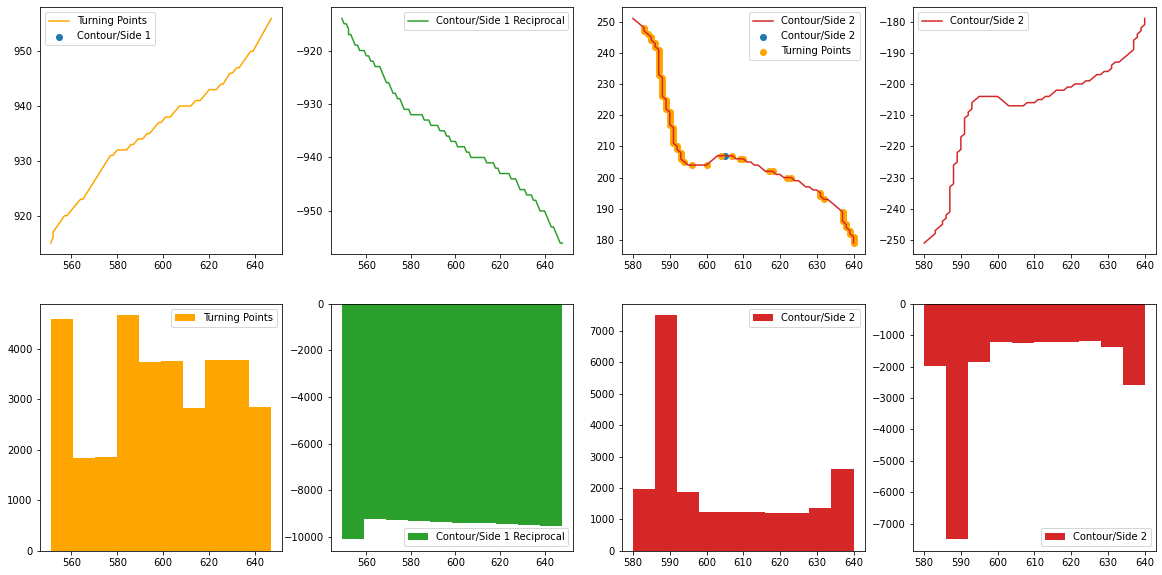

In [79]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y))
dy = np.gradient(np.array(cont_1_y),np.array(cont_1_x))
zero_crossings = np.where(np.diff(np.sign(dy)))[0]
peaks_cont_2y, _ = find_peaks(np.array(cont_2_y))
dy2 = np.gradient(np.array(cont_2_y),np.array(cont_2_x))
zero_crossings2 = np.where(np.diff(np.sign(dy2)))[0]
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
# plt.plot(np.array(cont_1_x),np.array(cont_1_y), color = 'tab:green', label = "Contour/Side 1")
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.plot(np.array(cont_1_x)[zero_crossings], np.array(cont_1_y)[zero_crossings],label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,2)
plt.plot(np.array(cont_1_x),np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,3)
plt.plot(cont_2_x,cont_2_y, color = 'tab:red',label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,4)
plt.plot(np.array(cont_2_x),np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

# HISTOGRAMS
plt.subplot(2,4,5)
plt.hist(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,6)
plt.hist(x = np.array(cont_1_x),weights = np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,7)
plt.hist(x = cont_2_x,weights = cont_2_y, color = 'tab:red',label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,8)
plt.hist(x = np.array(cont_2_x),weights = np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

plt.show()

c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Count'>

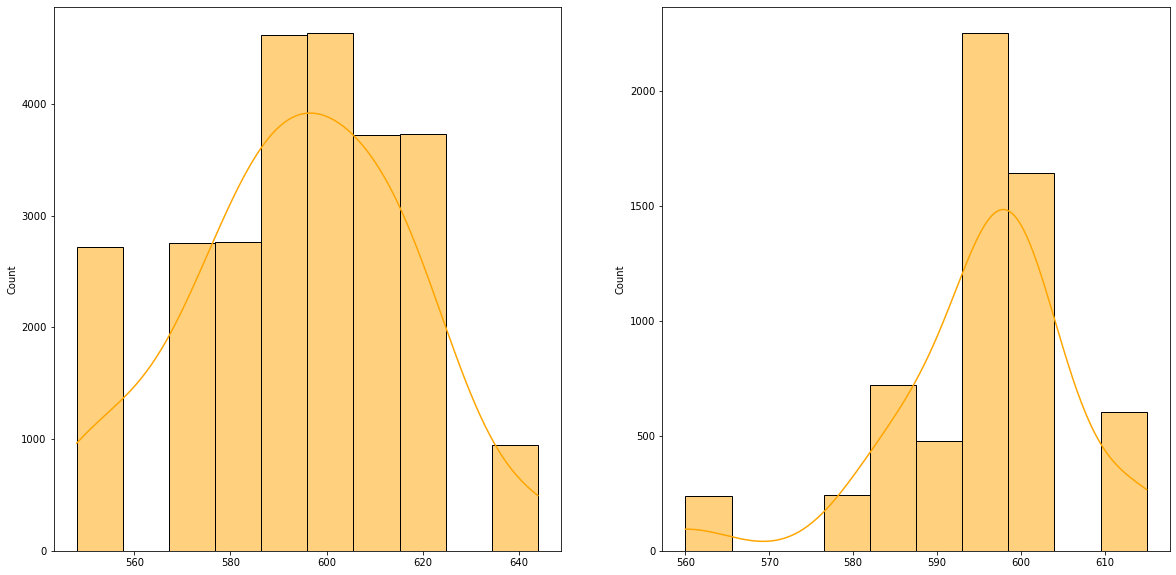

In [25]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange",kde = True)
plt.subplot(1,2,2)
sns.histplot(x = np.array(cont_2_x)[zero_crossings], weights = np.array(cont_2_y)[zero_crossings],label="Turning Points", color="orange", kde = True )

## Attempt Gaussian Mixture Modelling

In [26]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Example data
data = np.concatenate([np.array(cont_2_x)[zero_crossings], np.array(cont_2_y)[zero_crossings]])

# Fit a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))

# Predict component membership for each data point
labels = gmm.predict(data.reshape(-1, 1))

# Check how many unique components there are
num_components = len(np.unique(labels))
print("Number of components:", num_components)

Number of components: 2


Mean contour method:
- generate training dataset this way as well


Dot product method looking at one side and then looking at the peaks where it indicates the direction towards the back...


Light weight NN method 